In [52]:
import pandas as pd
import numpy as np
import pickle 

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_excel('../dataset/preprocessed.xlsx')
df.shape

(36791, 8)

In [9]:
#setup y(target) dan x(fitur)
X = df[['channel_title','category_id','comment_count','desc_len','likes','dislikes']] #fitur dapat disesuaikan
y = df[['views']] #target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
 #Train linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [53]:
with open('../model/liniear_regresion_model.pkl', 'wb') as model_file:
    pickle.dump(regressor, model_file)

In [12]:
X_test.head()

,channel_title,category_id,comment_count,desc_len,likes,dislikes
3792,-0.263813,0.371954,-0.157930,0.131970,-0.255827,-0.084666
13480,0.147041,0.371954,-0.103442,-1.002954,-0.245546,-0.030243
21110,0.637232,0.523005,-0.168963,-0.728336,-0.260685,-0.080508
35549,1.589279,0.825108,-0.141243,0.919369,-0.246378,-0.096208
2952,-0.198643,0.371954,-0.178567,0.161133,-0.275361,-0.091802


In [13]:
print(regressor.intercept_)

[1071162.8837417]


In [14]:
y_pred

array([[ 444363.14260457],
       [ 217020.74238885],
       [  78104.94780462],
       ...,
       [1262328.67325045],
       [  79056.06787688],
       [ 281541.70485976]])

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25753 entries, 23009 to 15795
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   channel_title  25753 non-null  float64
 1   category_id    25753 non-null  float64
 2   comment_count  25753 non-null  float64
 3   desc_len       25753 non-null  float64
 4   likes          25753 non-null  float64
 5   dislikes       25753 non-null  float64
dtypes: float64(6)
memory usage: 1.4 MB


In [16]:
X.columns

Index(['channel_title', 'category_id', 'comment_count', 'desc_len', 'likes',
       'dislikes'],
      dtype='object')

In [17]:
regressor.coef_

array([[-232834.37826461, -136076.84878981, -424067.55754507,
         151994.35010519, 2606768.47024713,  682211.32869016]])

In [33]:
#check overfit/underfit
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate

def eval_regression(model):
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  print('RMSE (test): ' + str(mean_squared_error(y_test, y_pred, squared=False)))
  print('RMSE (train): ' + str(mean_squared_error(y_train, y_pred_train, squared=False)))


  # k-fold cross validation
  score = cross_validate(model, X, y, cv=5, scoring='r2', return_train_score=True)
  print('r2 (cross-val test): ' + str(score['test_score'].mean()))
  print('r2 (cross-val train): ' + str(score['train_score'].mean()))

eval_regression(regressor)

RMSE (test): 1599975.9919191753
RMSE (train): 1553522.1996171768
r2 (cross-val test): 0.5699869297017223
r2 (cross-val train): 0.7639339355743358


In [34]:
# Regularization: Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
eval_regression(ridge)

RMSE (test): 1599978.421799263
RMSE (train): 1553522.2138025078
r2 (cross-val test): 0.5701693709385444
r2 (cross-val train): 0.7639339301819186


In [35]:
# Hyperparameter Tuning - Ridge
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

alpha = [0.001, 0.01]
solver = ['auto', 'cholesky', 'lsqr']
hyperparameters = dict(alpha=alpha, solver=solver)

from sklearn.linear_model import Ridge
ridge = Ridge()
rs = RandomizedSearchCV(ridge, hyperparameters, scoring='r2', cv=5, random_state=42)
rs.fit(X_train, y_train)
eval_regression(rs)

RMSE (test): 1599975.9943328493
RMSE (train): 1553522.199617191
r2 (cross-val test): 0.569988755801309
r2 (cross-val train): 0.7639339355737962


In [36]:
# Regularization - Elastic Net
from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train, y_train)
eval_regression(elasticnet_model)

RMSE (test): 1809251.7988091295
RMSE (train): 1750974.3927652922


r2 (cross-val test): 0.6648273519269956
r2 (cross-val train): 0.6940123796513756


In [37]:
# Hyperparameter Tuning - Elastic Net
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
l1_ratio = np.arange(0, 1, 0.01)
hyperparameters = dict(alpha=alpha, l1_ratio=l1_ratio)

from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet()
clf = RandomizedSearchCV(elasticnet_model, hyperparameters, cv=5, random_state=42, scoring='r2')
clf.fit(X_train, y_train)
eval_regression(clf)

RMSE (test): 1599975.9919191753
RMSE (train): 1553522.1996171768
r2 (cross-val test): 0.5736262160489607
r2 (cross-val train): 0.7639317435186317


In [38]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
eval_regression(dt)

RMSE (test): 728368.6063934449
RMSE (train): 10929.455451891086
r2 (cross-val test): 0.7420674010240574
r2 (cross-val train): 0.9999866433410656


In [54]:
with open('../model/decision_tree_model.pkl', 'wb') as model_file:
    pickle.dump(dt, model_file)

In [39]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
eval_regression(rf)

RMSE (test): 631312.1316016391
RMSE (train): 235124.1481025749
r2 (cross-val test): 0.8350481420124203
r2 (cross-val train): 0.9967608748247538


In [55]:
with open('../model/random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf, model_file)

In [58]:
with open('../model/random_forest_model.pkl', 'rb') as model_file:
   rf = pickle.load(model_file)

EOFError: Ran out of input

In [59]:
%pwd

'd:\\rakamin\\final project\\finpro_rakamin\\finpro_rakamin\\Week 14\\code'

In [48]:

feature_importances=rf.feature_importances_

In [49]:
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

In [50]:
importances_df

,Feature,Importance
0,channel_title,0.133646
1,category_id,0.014645
2,comment_count,0.044137
3,desc_len,0.023988
4,likes,0.575361
5,dislikes,0.208223


In [40]:
# # Support Vector Regressor
# from sklearn.svm import SVR
# svr = SVR()
# svr.fit(X_train, y_train)
# eval_regression(svr)

RMSE (test): 3342064.3056387724
RMSE (train): 3277217.732544082


KeyboardInterrupt: 

<function matplotlib.pyplot.show(close=None, block=None)>

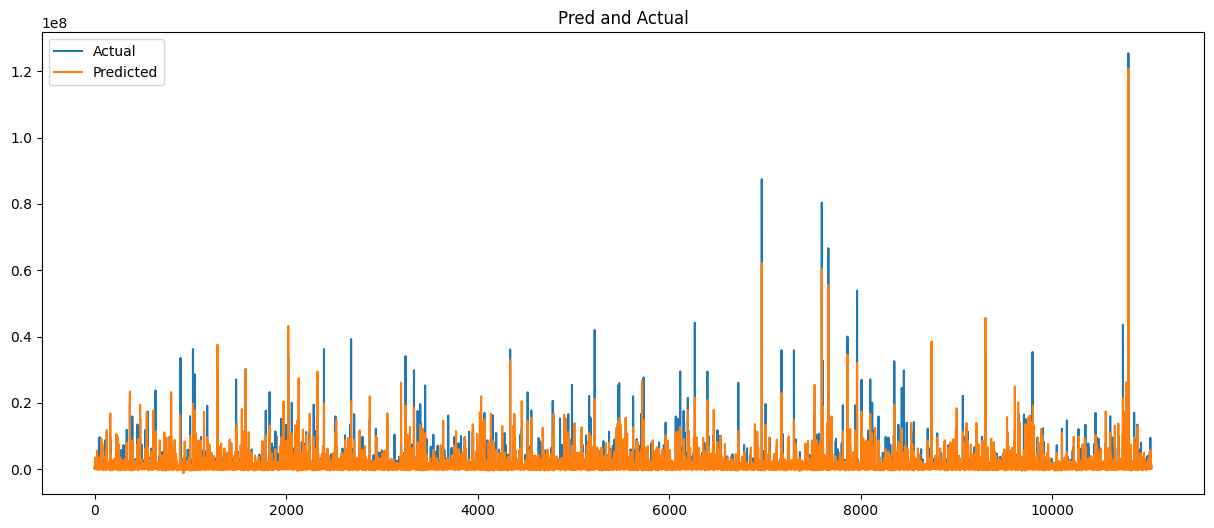

In [44]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, len(y_test))
# Plot hasil prediksi dan nilai aktual
plt.figure(figsize=(15,6))
plt.plot(x, y_test, label='Actual')
plt.plot(x, y_pred, label='Predicted')
plt.title('Pred and Actual')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

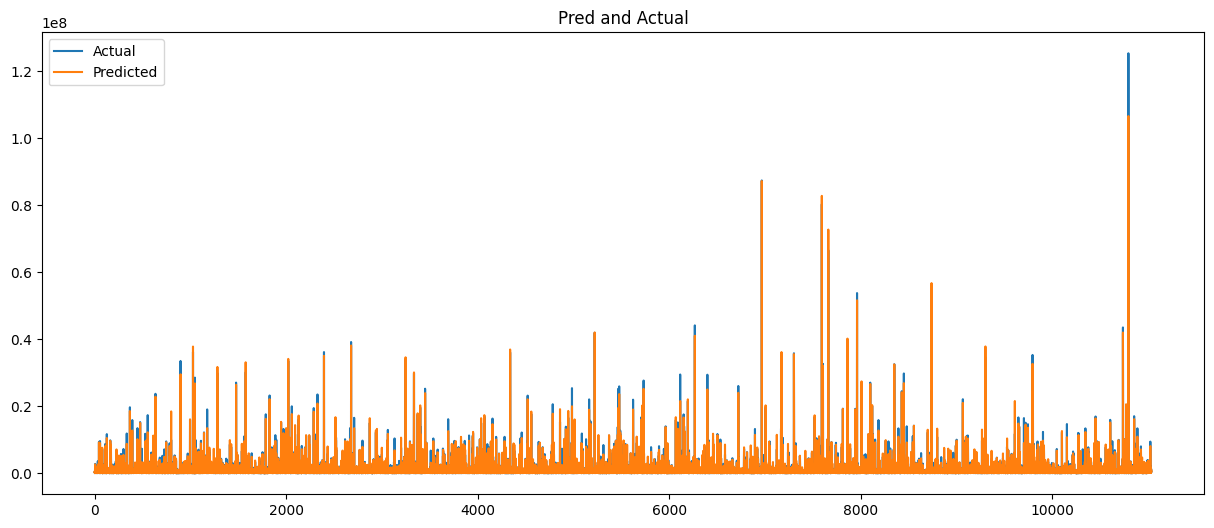

In [45]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, len(y_test))
# Plot hasil prediksi dan nilai aktual
y_predict= rf.predict(X_test)
plt.figure(figsize=(15,6))
plt.plot(x, y_test, label='Actual')
plt.plot(x, y_predict, label='Predicted')
plt.title('Pred and Actual')
plt.legend()
plt.show